c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

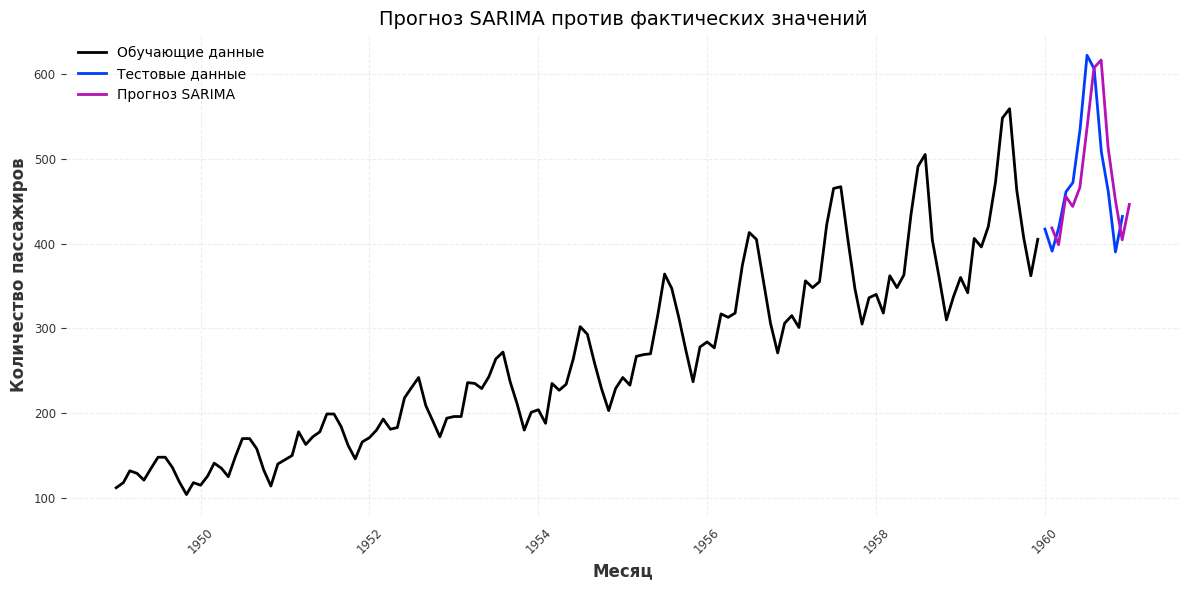

Среднеквадратичная ошибка SARIMA: 14.63


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('AirPassengers.csv')  # Замените на путь к вашему файлу
data["Month"] = pd.to_datetime(data["Month"]).dt.to_period("M").dt.to_timestamp()

# Определяем последний год для тестовой выборки
last_year = data["Month"].dt.year.max()

# Разделение данных: тренировочные и тестовые
train_data = data[data["Month"].dt.year < last_year]
test_data = data[data["Month"].dt.year == last_year]

# Устанавливаем индекс для временного ряда
train_data.set_index("Month", inplace=True)
test_data.set_index("Month", inplace=True)

# Обучение модели SARIMA
# Параметры (p, d, q) и (P, D, Q, s)
# Здесь p, d, q - параметры для ARIMA, а P, D, Q - сезонные параметры, s - период сезонности (12 для месячных данных)
sarima_model = sm.tsa.SARIMAX(train_data['#Passengers'], 
                               order=(3, 0, 5), 
                               seasonal_order=(2, 1, 1, 12))

# Фитирование модели
sarima_fit = sarima_model.fit(disp=False)

# Прогнозирование на 12 месяцев вперед
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=test_data.index[0], periods=12, freq='M')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['#Passengers'], label='Обучающие данные', lw=2)
plt.plot(test_data.index, test_data['#Passengers'], label='Тестовые данные', lw=2)
plt.plot(forecast_series.index, forecast_series, label='Прогноз SARIMA', lw=2)

# Добавление заголовка и подписей к осям
plt.title("Прогноз SARIMA против фактических значений", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Количество пассажиров", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()

# Вычисление RMSE для SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test_data["#Passengers"], forecast_series.values))
print(f"Среднеквадратичная ошибка SARIMA: {sarima_rmse:.2f}")
